<h3> Sergio Andres Rios Gomez</h3>
<h4> Transformación y procesamiento</h4>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import os

In [2]:
ruta_archivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(ruta_archivo)

<p>Tratamiento de valores nulos:
Para "TotalCharges", imputaremos los valores nulos con la mediana, ya que es menos sensible a los valores atípicos que la media.</p>

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

<p> Codificación de variables binarias con registros de texto: "gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling" y "Churn" tienen solo dos categorías.</p>

In [4]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

<p> Codificación one-hot: "InternetService", "Contract" y "PaymentMethod" tienen múltiples categorías. Usaremos codificación one-hot para crear columnas binarias para cada categoría.</p>

In [5]:
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=categorical_cols)

# Convertir columnas booleanas a enteros (1 y 0)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [11]:
df = df.drop('customerID', axis=1)

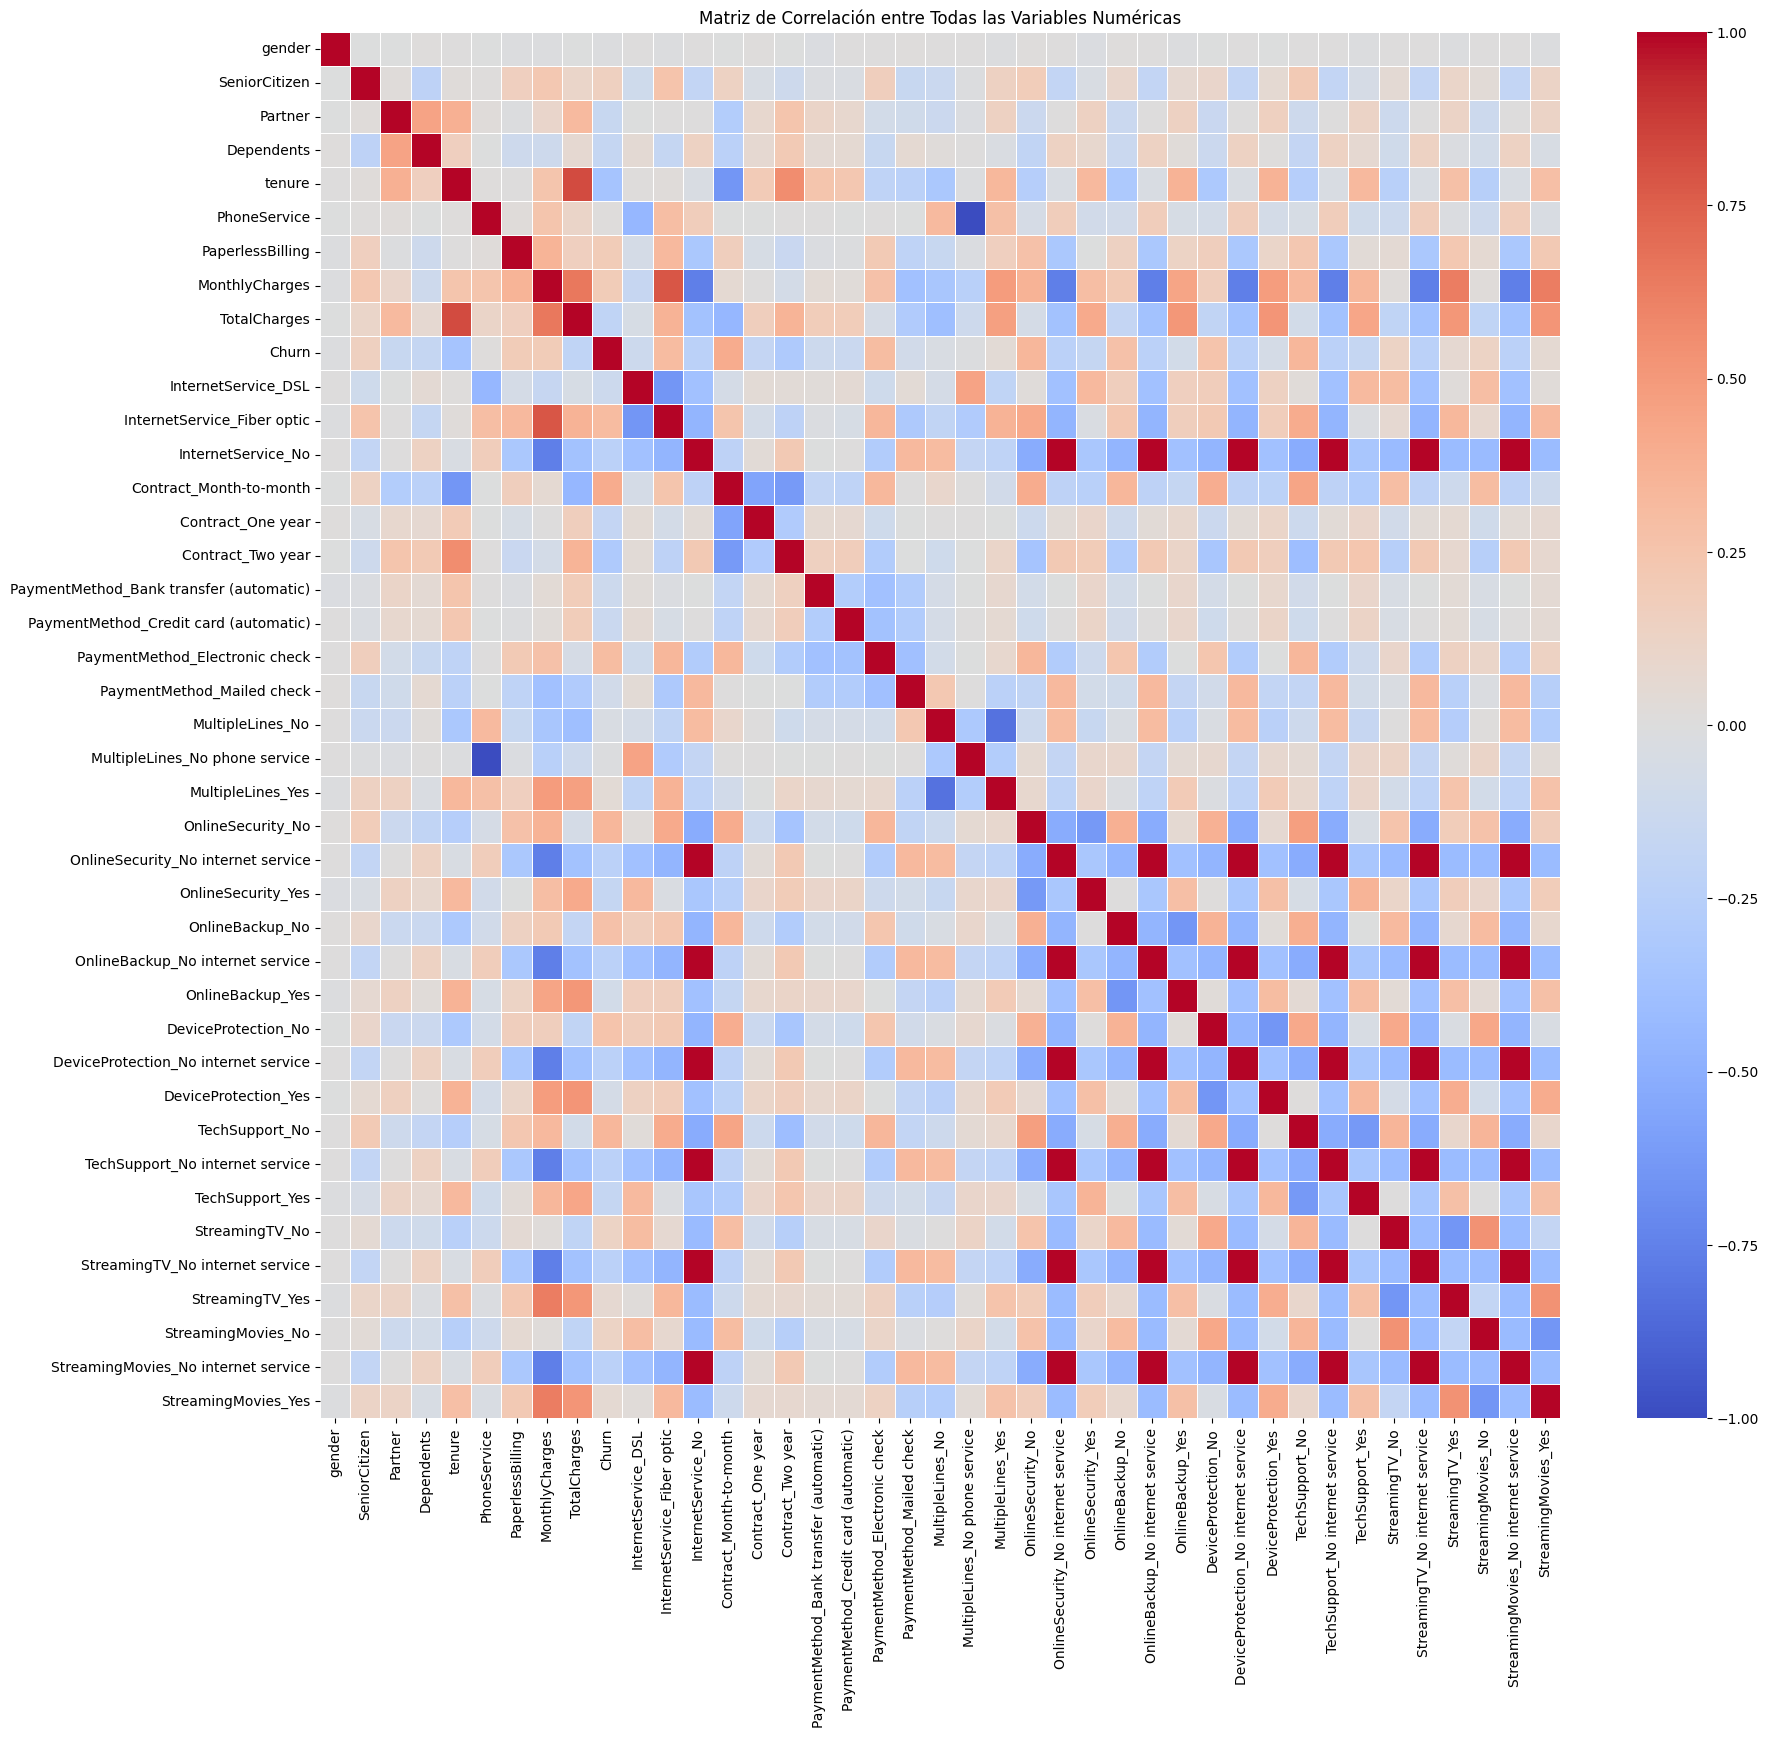

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 18))  # Aumenta el tamaño de la figura para acomodar más variables
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) # annot = false para no ver todos los valores en la matriz.
plt.title('Matriz de Correlación entre Todas las Variables Numéricas')
plt.show()

<p> Guardar archivo con data procesada en la ruta especifica.</p>

In [19]:
df_process_data = df
ruta_processed = os.path.join(os.getcwd(), '..', 'data','processed')
if not os.path.exists(ruta_processed):
    os.makedirs(ruta_processed)
ruta_archivo_csv = os.path.join(ruta_processed, 'df_process_data.csv')
df_process_data.to_csv(ruta_archivo_csv, index=False)

<h3> Conclusiones</h3>
<li> Relación entre tipo de contrato y Churn: Los contratos a corto plazo (mes a mes) están asociados con una mayor probabilidad de abandono, mientras que los contratos a largo plazo (dos años) están asociados con una menor probabilidad. </li>
<li>Los clientes que utilizan cheques electrónicos tienen una mayor probabilidad de abandono, mientras que los clientes que utilizan pagos automáticos tienen una menor probabilidad. </li>
<li> Correlación entre el tipo de servicio de internet y los cargos mensuales: Los clientes con fibra óptica tienden a tener cargos mensuales más altos. Esto podría deberse a que la fibra óptica ofrece velocidades más rápidas y mejores servicios.</li>